In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

df = pd.read_csv('S02-hw-dataset.csv')

print("Первые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nСтатистическое описание:")
display(df.describe())

Первые 5 строк:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Статистическое описание:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [ ]:
# 1. Проверяем столбцы на пропуски
print("Доля пропусков в каждом столбце:")
print(df.isna().mean())

# 2. Проверяем на дубликаты
dup_count = df.duplicated().sum()
print(f"\nКоличество дубликатов строк: {dup_count}")

# 3. Логические проверки (Аномалии)
print("\n--- Подозрительные данные ---")

# Ищем тех, кто младше 10 или старше 100 лет
weird_age = df[(df['age'] < 10) | (df['age'] > 100)]
if not weird_age.empty:
    print("Странный возраст:")
    display(weird_age)

# Ищем отрицательные покупки
negative_sales = df[df['purchases'] < 0]
if not negative_sales.empty:
    print("Отрицательное кол-во покупок:")
    display(negative_sales)

Доля пропусков в каждом столбце:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество дубликатов строк: 1

--- Подозрительные данные ---
Странный возраст:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


Отрицательное кол-во покупок:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [8]:
# Распределение покупателей по странам
print("Количество пользователей по странам:")
print(df['country'].value_counts())

# Группировка: Сколько денег (revenue) в среднем приносят пользователи разных стран
# и какой у них средний возраст
grouped_stats = df.groupby('country')[['revenue', 'age']].mean()

print("\nСредние показатели по странам:")
display(grouped_stats)

Количество пользователей по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Средние показатели по странам:


,revenue,age
country,,
CN,1054.000000,24.000000
DE,1445.500000,34.600000
FR,675.916667,46.250000
RU,790.076923,30.076923
US,557.375000,36.714286


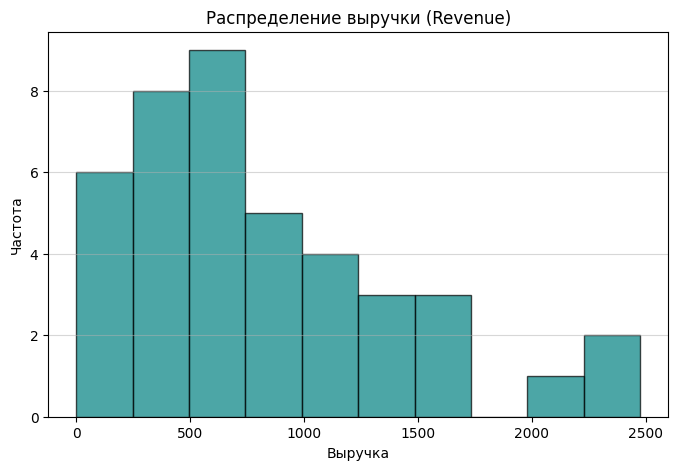

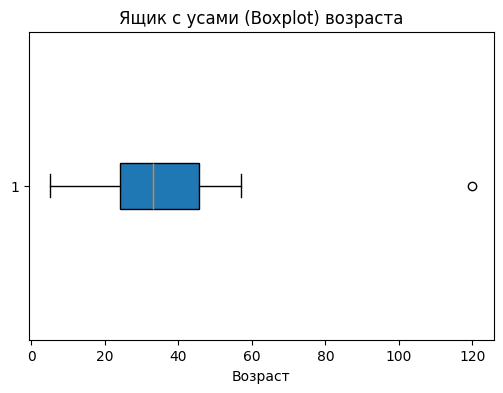

График сохранен в файл: figures/scatter_plot.png


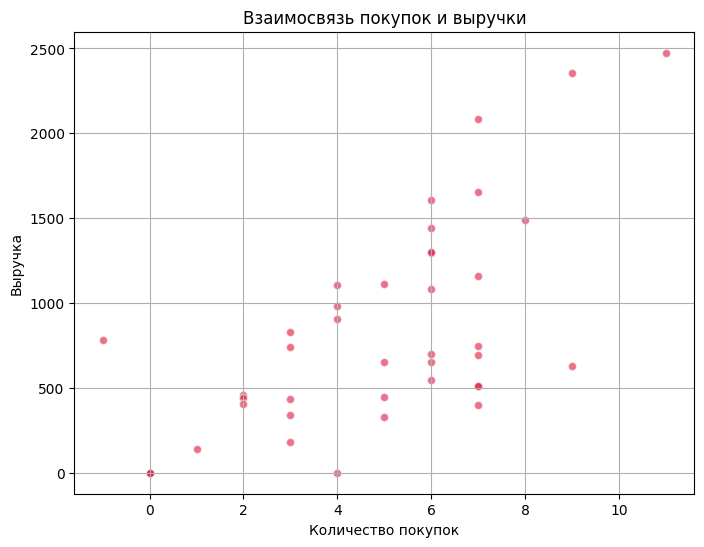

In [9]:
os.makedirs('figures', exist_ok=True)

# График 1: Гистограмма выручки
plt.figure(figsize=(8, 5))
plt.hist(df['revenue'], bins=10, color='teal', edgecolor='black', alpha=0.7)
plt.title('Распределение выручки (Revenue)')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.show()

# График 2: Boxplot для возраста (удаляем пустые значения для корректного отображения)
plt.figure(figsize=(6, 4))
plt.boxplot(df['age'].dropna(), vert=False, patch_artist=True)
plt.title('Ящик с усами (Boxplot) возраста')
plt.xlabel('Возраст')
plt.show()

# График 3: Scatter plot (Диаграмма рассеяния)
plt.figure(figsize=(8, 6))
plt.scatter(df['purchases'], df['revenue'], c='crimson', alpha=0.6, edgecolors='w')
plt.title('Взаимосвязь покупок и выручки')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(True)

# Сохранение графика
save_path = 'figures/scatter_plot.png'
plt.savefig(save_path)
print(f"График сохранен в файл: {save_path}")

plt.show()